In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import datetime

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (8.0, 6.0)

# Raw Table

In [2]:
file_1 = pq.read_table('../data_folder/Online_Tracker_Jan24/part-00000-eaca2b13-51fa-4c04-a12d-9d8d808921c7.parquet').\
    to_pandas()
file_2 = pq.read_table('../data_folder/Online_Tracker_Jan24/part-00001-eaca2b13-51fa-4c04-a12d-9d8d808921c7.parquet').\
    to_pandas()
file_3 = pq.read_table('../data_folder/Online_Tracker_Jan24/part-00002-eaca2b13-51fa-4c04-a12d-9d8d808921c7.parquet').\
    to_pandas()
file_4 = pq.read_table('../data_folder/Online_Tracker_Jan24/part-00003-eaca2b13-51fa-4c04-a12d-9d8d808921c7.parquet').\
    to_pandas()
file_5 = pq.read_table('../data_folder/Online_Tracker_Jan24/part-00004-eaca2b13-51fa-4c04-a12d-9d8d808921c7.parquet').\
    to_pandas()
file_6 = pq.read_table('../data_folder/Online_Tracker_Jan24/part-00005-eaca2b13-51fa-4c04-a12d-9d8d808921c7.parquet').\
    to_pandas()
file_7 = pq.read_table('../data_folder/Online_Tracker_Jan24/part-00006-eaca2b13-51fa-4c04-a12d-9d8d808921c7.parquet').\
    to_pandas()
file_8 = pq.read_table('../data_folder/Online_Tracker_Jan24/part-00007-eaca2b13-51fa-4c04-a12d-9d8d808921c7.parquet').\
    to_pandas()

In [3]:
online_tracker = pd.concat([file_1, file_2, file_3, file_4, file_5, file_6, file_7, file_8])

In [4]:
online_tracker.columns.values

array(['ESN', 'DSID', 'REL_ESN', 'FAILURE_DATE', 'CMP_SUM_NET_AMOUNT',
       'CMP_SUM_MATERIALS_AMOUNT', 'CMP_SUM_MARKUP_AMOUNT',
       'CMP_SUM_REPAIR_LABOR_AMOUNT', 'CMP_SUM_OTHER_EXPENSE_AMOUNT',
       'CMP_SUM_DEDUCTIBLE_AMOUNT', 'CMP_FAIL_DATE_LIST',
       'CMP_CLAIM_DATE_LIST', 'CMP_PAYMENT_DATE_LIST',
       'CMP_IN_SERVICE_DATE_LIST', 'CMP_ESN_LIST', 'CMP_FAIL_CODE_LIST',
       'CMP_FAIL_CODE_DESC_LIST', 'CMP_DISTRIBUTOR_CODE_LIST',
       'CMP_CLAIM_NUM_LIST', 'CMP_ENGINE_MILES_LIST', 'DSID_CREATE_DATE',
       'DSID_LAST_UPDATED_DATE', 'GREEN_WRENCH_FAULT_CODE_LIST',
       'GREEN_WRENCH_NUM_LIST', 'GREEN_WRENCH_LIST', 'CSS_INDICATOR_LIST',
       'DSID_CURRENT_STATUS_LIST', 'GREEN_WRENCH_DESC_LIST',
       'NON_GREEN_WRENCH_FAULT_CODE_LIST', 'DSID_LIST',
       'DSID_CREATE_DATE_LIST', 'DSID_LAST_UPDATED_DATE_LIST',
       'INCIDENT_TRACKER_JOIN_TYPE', 'INCDT_FAIL_DATE',
       'INCDT_EARLIEST_INDICATION_DATE', 'INCDT_ISSUE_NUMBER',
       'INCDT_ISSUE_LABEL', 'ENGINE_D

In [5]:
online_tracker.shape

(774463, 146)

# Table Cleaning

In [34]:
online_tracker.INCDT_ISSUE_LABEL.value_counts()

not_issue                                                     3713
amyr-ak4qpf                                                    299
ho284-25600                                                     70
2017-jep-mnc-00001320-escar-01                                  48
ne121-27806                                                     41
lo048-27723                                                     40
lo401-28283                                                     37
gp716-27472                                                     30
lt945-26564                                                     28
lo048-27717                                                     24
jz327-25890                                                     20
mq007-26346                                                     19
2017-mpt-mnc-00000566-iscar-01                                  16
ou006-27316                                                     15
mq007-28013                                                   

In [36]:
online_tracker_cp = online_tracker.loc[:, ['ESN', 'CMP_SUM_NET_AMOUNT', 'CMP_CLAIM_DATE_LIST', 
                                          'CMP_IN_SERVICE_DATE_LIST', 'DSID_CREATE_DATE', 
                                          'CMP_FAIL_CODE_LIST', 'GREEN_WRENCH_FAULT_CODE_LIST', 
                                          'DSID_CREATE_DATE_LIST', 'INCIDENT_TRACKER_JOIN_TYPE', 
                                          'INCDT_ISSUE_LABEL', 'CMP_ENGINE_MILES_LIST']]

In [39]:
online_tracker_cp['Ealirest_Claim_Date'] = online_tracker_cp['CMP_CLAIM_DATE_LIST'].\
    apply(lambda x: min(datetime.datetime.strptime(xtmp[:10], '%Y-%m-%d') for xtmp in x) \
          if not x is None and len(x) > 0 else np.nan)

In [40]:
online_tracker_cp['Earliest_Indication_Date'] = [dsid_dt if not pd.isna(dsid_dt) else claim_dt 
                                                 for dsid_dt, claim_dt in 
                                                 zip(online_tracker_cp['DSID_CREATE_DATE'], 
                                                     online_tracker_cp['Ealirest_Claim_Date'])]

In [41]:
online_tracker_cp.count()

ESN                             774463
CMP_SUM_NET_AMOUNT              559859
CMP_CLAIM_DATE_LIST             559859
CMP_IN_SERVICE_DATE_LIST        559859
DSID_CREATE_DATE                379411
CMP_FAIL_CODE_LIST              559859
GREEN_WRENCH_FAULT_CODE_LIST    319361
DSID_CREATE_DATE_LIST            70693
INCIDENT_TRACKER_JOIN_TYPE      774463
INCDT_ISSUE_LABEL                 4627
CMP_ENGINE_MILES_LIST           559859
Ealirest_Claim_Date             559615
Earliest_Indication_Date        774219
dtype: int64

# Cleaned Table

In [42]:
online_tracker_dummy_table = pq.read_table('../data_folder/Jan24_dummyTable_complete.parq').to_pandas()

In [43]:
online_tracker_dummy_table.shape

(774463, 326)

In [44]:
online_tracker_dummy_table.columns.values

array(['ESN', 'DSID', 'REL_ESN', 'FAILURE_DATE', 'CMP_SUM_NET_AMOUNT',
       'CMP_SUM_MATERIALS_AMOUNT', 'CMP_SUM_MARKUP_AMOUNT',
       'CMP_SUM_REPAIR_LABOR_AMOUNT', 'CMP_SUM_OTHER_EXPENSE_AMOUNT',
       'CMP_SUM_DEDUCTIBLE_AMOUNT', 'DSID_CREATE_DATE',
       'DSID_LAST_UPDATED_DATE', 'INCIDENT_TRACKER_JOIN_TYPE',
       'INCDT_FAIL_DATE', 'INCDT_EARLIEST_INDICATION_DATE',
       'INCDT_ISSUE_NUMBER', 'INCDT_ISSUE_LABEL', 'ENGINE_DESCRIPTION',
       'BUILD_DATE', 'BUILD_YEAR', 'BUILD_MONTH', 'BUILD_DAY_OF_MONTH',
       'BUILD_DAY_OF_WEEK', 'BUILT_ON_WEEKEND',
       'OEPL_CAPACITY_HIGH_LOW_RANGE_GALLONS',
       'OEPL_COMPRESSOR_AIR_INLET_TYPE', 'OEPL_COMPRESSOR_TYPE',
       'OEPL_POWER_ANGLE_RANGE_DEGREE', 'OEPL_THERMOSTAT_HOUSING',
       'OEPL_PEAK_TORQUE', 'OEPL_ST', 'OEPL_HORSEPOWER', 'OEPL_BUILD_DATE',
       'BLOWBY_HIGH_IDLE_LAST_TEST_VALUE',
       'BLOWBY_LOW_IDLE_LAST_TEST_VALUE',
       'BLOWBY_RATED_HP_LAST_TEST_VALUE',
       'ECM_BOOST_ABS_HIGH_IDLE_LAST_TEST_VALU

In [45]:
online_tracker_dummy_table.head()

ESN       DSID   REL_ESN FAILURE_DATE  CMP_SUM_NET_AMOUNT  \
index                                                                   
0      79634063  DSBGS3727  79634063   2015-02-20              437.85   
1      79634063       None  79634063   2014-10-30             3935.44   
2      79634063  DSBHT7658      None          NaT                 NaN   
3      79634063       None  79634063   2015-07-30              142.89   
4      79634063       None  79634063   2014-01-08              277.25   

       CMP_SUM_MATERIALS_AMOUNT  CMP_SUM_MARKUP_AMOUNT  \
index                                                    
0                         93.54                  28.06   
1                       2104.34                 534.25   
2                           NaN                    NaN   
3                          4.75                   1.43   
4                         18.65                   5.60   

       CMP_SUM_REPAIR_LABOR_AMOUNT  CMP_SUM_OTHER_EXPENSE_AMOUNT  \
index                                                              
0                           316.25                           0.0   
1                           558.30                           0.0   
2                              NaN                           NaN   
3                           147.21                           0.0   
4                           253.00                           0.0   

       CMP_SUM_DEDUCTIBLE_AMOUNT         ...         LAST_MILE_RECORDED  \
index                                    ...                              
0                           0.00         ...                   140612.0   
1                           0.00         ...                   107539.0   
2                            NaN         ...                        NaN   
3                          10.51         ...                   173005.0   
4                           0.00         ...                    15993.0   

       Miles_Imputed Miles_Log_Normalized Last_Mile_Record_Time  AGE  \
index                                                                  
0      140612.000000             0.242658            2015-02-20 -1.0   
1      107539.000000             0.125055            2014-10-30  NaN   
2      163842.142684             0.309716                   NaT  NaN   
3      173005.000000             0.333581            2015-07-30  NaN   
4       15993.000000            -0.710733            2014-01-08  NaN   

      AGE_Log_Normalized Net_Amount_Imputed Net_Amount_Log_Normalized Missing  \
index                                                                           
0          -2.567326e-01      -3.094450e-01                  6.081876   False   
1          -1.247285e-12       7.854806e-01                  8.277778    True   
2          -1.247285e-12      -1.414767e-12                  5.771191   False   
3          -1.247285e-12      -4.017827e-01                  4.962075    True   
4          -1.247285e-12      -3.597211e-01                  5.624920    True   

            EARLIEST_DATE  
index                      
0     2015-02-23 00:00:00  
1     2014-11-11 00:00:00  
2     2015-07-30 12:15:59  
3     2015-07-30 00:00:00  
4     2014-01-13 00:00:00  

[5 rows x 326 columns]

In [48]:
feature_name_fault_codes = []
for cur_name in online_tracker_dummy_table.columns.values:
    if len(cur_name) > 10:
        if cur_name[:10] == 'Fault_Code':
            feature_name_fault_codes.append(cur_name)

In [50]:
feature_name_fail_codes = []
for cur_name in online_tracker_dummy_table.columns.values:
    if len(cur_name) > 10:
        if cur_name[:10] == 'Fail_Code_':
            feature_name_fail_codes.append(cur_name)

In [52]:
feature_name_fail_codes_pre = []
for cur_name in online_tracker_dummy_table.columns.values:
    if len(cur_name) > 13:
        if cur_name[:13] == 'Fail_Code_Pre':
            feature_name_fail_codes_pre.append(cur_name)

In [53]:
feature_name_fail_codes_app = []
for cur_name in online_tracker_dummy_table.columns.values:
    if len(cur_name) > 13:
        if cur_name[:13] == 'Fail_Code_App':
            feature_name_fail_codes_app.append(cur_name)

In [54]:
feature_name_fail_codes = list(set(feature_name_fail_codes) - 
                               set(feature_name_fail_codes_pre) - 
                               set(feature_name_fail_codes_app))

In [56]:
feature_name_miles = ['Miles_Log_Normalized']
feature_name_age = ['AGE_Log_Normalized']
feature_name_net_amount = ['Net_Amount_Log_Normalized']

In [57]:
all_feature_names = []
all_feature_names.extend(feature_name_miles)
all_feature_names.extend(feature_name_fault_codes)
all_feature_names.extend(feature_name_fail_codes)
all_feature_names.extend(feature_name_fail_codes_pre)
all_feature_names.extend(feature_name_fail_codes_app)
all_feature_names.extend(feature_name_age)
all_feature_names.extend(feature_name_net_amount)

In [58]:
cluster_df = online_tracker_dummy_table.loc[:, all_feature_names].copy()
cluster_df.loc[:, feature_name_miles] = cluster_df.loc[:, feature_name_miles] * 2
cluster_df.loc[:, feature_name_fault_codes] = cluster_df.loc[:, feature_name_fault_codes] * 4.25
cluster_df.loc[:, feature_name_fail_codes] = cluster_df.loc[:, feature_name_fail_codes] * 4.25
cluster_df.loc[:, feature_name_fail_codes_pre] = cluster_df.loc[:, feature_name_fail_codes_pre] * 0.25
cluster_df.loc[:, feature_name_fail_codes_app] = cluster_df.loc[:, feature_name_fail_codes_app] * 2.75
cluster_df.loc[:, feature_name_net_amount] = cluster_df.loc[:, feature_name_net_amount] * 2.75

# Clustering with labeled ones using Birch

In [62]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import random
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import Birch
import time

In [122]:
online_tracker_dummy_table.columns.values

array(['ESN', 'DSID', 'REL_ESN', 'FAILURE_DATE', 'CMP_SUM_NET_AMOUNT',
       'CMP_SUM_MATERIALS_AMOUNT', 'CMP_SUM_MARKUP_AMOUNT',
       'CMP_SUM_REPAIR_LABOR_AMOUNT', 'CMP_SUM_OTHER_EXPENSE_AMOUNT',
       'CMP_SUM_DEDUCTIBLE_AMOUNT', 'DSID_CREATE_DATE',
       'DSID_LAST_UPDATED_DATE', 'INCIDENT_TRACKER_JOIN_TYPE',
       'INCDT_FAIL_DATE', 'INCDT_EARLIEST_INDICATION_DATE',
       'INCDT_ISSUE_NUMBER', 'INCDT_ISSUE_LABEL', 'ENGINE_DESCRIPTION',
       'BUILD_DATE', 'BUILD_YEAR', 'BUILD_MONTH', 'BUILD_DAY_OF_MONTH',
       'BUILD_DAY_OF_WEEK', 'BUILT_ON_WEEKEND',
       'OEPL_CAPACITY_HIGH_LOW_RANGE_GALLONS',
       'OEPL_COMPRESSOR_AIR_INLET_TYPE', 'OEPL_COMPRESSOR_TYPE',
       'OEPL_POWER_ANGLE_RANGE_DEGREE', 'OEPL_THERMOSTAT_HOUSING',
       'OEPL_PEAK_TORQUE', 'OEPL_ST', 'OEPL_HORSEPOWER', 'OEPL_BUILD_DATE',
       'BLOWBY_HIGH_IDLE_LAST_TEST_VALUE',
       'BLOWBY_LOW_IDLE_LAST_TEST_VALUE',
       'BLOWBY_RATED_HP_LAST_TEST_VALUE',
       'ECM_BOOST_ABS_HIGH_IDLE_LAST_TEST_VALU

In [124]:
cluster_df_labeled = cluster_df.loc[~online_tracker_dummy_table.INCDT_ISSUE_LABEL.isnull(), :].copy()
online_tracker_info = online_tracker_dummy_table.loc[~online_tracker_dummy_table.INCDT_ISSUE_LABEL.isnull(), 
                                                     ['ESN', 'CMP_SUM_NET_AMOUNT', 
                                                      'DSID_CREATE_DATE', 'AGE',
                                                      'INCIDENT_TRACKER_JOIN_TYPE', 
                                                      'INCDT_ISSUE_LABEL', 'LAST_MILE_RECORDED', 
                                                      'EARLIEST_DATE']].copy()

In [141]:
online_tracker_info.dtypes

ESN                                   object
CMP_SUM_NET_AMOUNT                   float64
DSID_CREATE_DATE              datetime64[ns]
AGE                                  float64
INCIDENT_TRACKER_JOIN_TYPE            object
INCDT_ISSUE_LABEL                     object
LAST_MILE_RECORDED                   float64
EARLIEST_DATE                 datetime64[ns]
Cluster_ID                             int64
dtype: object

In [125]:
cluster_df_labeled.shape

(4627, 193)

In [126]:
online_tracker_info.count()

ESN                           4627
CMP_SUM_NET_AMOUNT            2507
DSID_CREATE_DATE              3311
AGE                           1191
INCIDENT_TRACKER_JOIN_TYPE    4627
INCDT_ISSUE_LABEL             4627
LAST_MILE_RECORDED            2507
EARLIEST_DATE                 4627
dtype: int64

In [258]:
model = Birch(branching_factor = 100, n_clusters = 100, threshold = 4.8, compute_labels=True)

In [259]:
Birch_Cluster_Labels = model.fit_predict(cluster_df_labeled.values)

/Users/ph697/anaconda3/lib/python3.6/site-packages/sklearn/cluster/birch.py:629: UserWarning: Number of subclusters found (94) by Birch is less than (100). Decrease the threshold.
  % (len(centroids), self.n_clusters))


In [260]:
online_tracker_info['Cluster_ID'] = Birch_Cluster_Labels

In [261]:
def get_clustering_KPI(clustering_result, 
                       verbose = True, 
                       cluster_size_threshold = 5,
                       issue_size_threshold = 5):
    #number of issues in one cluster
    avg_num_issues = 0
    for i in np.unique(clustering_result.Cluster_ID):
        cur_issues = set(clustering_result.query('Cluster_ID == @i').INCDT_ISSUE_LABEL)
        avg_num_issues = avg_num_issues + len(cur_issues)
        if 'Not_Issue' in cur_issues:
            avg_num_issues = avg_num_issues -1
    
    avg_num_issues = avg_num_issues / len(set(clustering_result.Cluster_ID))
    if verbose:
        print('KPI1: Average Number of Issues in Cluster is ' + str(avg_num_issues))
    
    #number of clusters one issue resides
    avg_num_clusters = 0
    if verbose:
        print('KPI3 considers issues with larger than ' + str(issue_size_threshold) + ' incidents')
    top_issues = clustering_result.INCDT_ISSUE_LABEL.value_counts().reset_index().\
        query('INCDT_ISSUE_LABEL > @issue_size_threshold')['index']
    top_issues = set(top_issues) - set('not_issue')
    for cur_issue in top_issues:
        cur_clusters = set(clustering_result.query('INCDT_ISSUE_LABEL == @cur_issue').Cluster_ID)
        avg_num_clusters = avg_num_clusters + len(cur_clusters)
    
    avg_num_clusters = avg_num_clusters / len(top_issues)
    if verbose:
        print('KPI3: Average Number of Clusters One Issue Resides is ' + str(avg_num_clusters))
        
    # mean largest issue in cluster percentage    
    tmp_df_long = clustering_result.query('INCDT_ISSUE_LABEL != "not_issue"').\
        groupby(['Cluster_ID', 'INCDT_ISSUE_LABEL']).count()['ESN'].reset_index()
    tmp_df_wide = tmp_df_long.pivot(index = 'Cluster_ID', 
                                    columns = 'INCDT_ISSUE_LABEL', 
                                    values = 'ESN').fillna(0)
    maximun_issue_count = tmp_df_wide.max(axis = 1)
    tmp_df_wide['Total_Assigned_Incidents'] = tmp_df_wide.sum(axis = 1)
    tmp_df_wide['Maximum_Incidents'] = maximun_issue_count
    tmp_df_wide['Max_Ratio'] = tmp_df_wide['Maximum_Incidents'] / tmp_df_wide['Total_Assigned_Incidents']
    if verbose:
        print('KPI2 considers clusters with larger than ' + str(issue_size_threshold) + ' incidents')
    if verbose:
        print('KPI2: Average Number of Largest Issue Percentage in One Cluster for Large Clusters ' + \
              str(tmp_df_wide.query('Total_Assigned_Incidents > @cluster_size_threshold')['Max_Ratio'].mean()))
    
    good_clusters = tmp_df_wide.query('Max_Ratio > 0.75').index
    
    # Percentage of incidents in largest cluster for one issue
    if verbose:
        print('KPI4 considers issues with larger than ' + str(issue_size_threshold) + ' incidents')
    tmp_df = clustering_result.groupby(['INCDT_ISSUE_LABEL', 'Cluster_ID'])\
        .count()['ESN'].reset_index().\
        pivot(index = 'INCDT_ISSUE_LABEL', columns = 'Cluster_ID', values = 'ESN').\
        fillna(0)
    maximun_incident_count = tmp_df.max(axis = 1)
    tmp_df['Total_Incidents'] = tmp_df.sum(axis = 1)
    tmp_df['Max_Incidents_in_Single_Cluster'] = maximun_incident_count
    tmp_df['Max_Ratio'] = tmp_df['Max_Incidents_in_Single_Cluster'] / tmp_df['Total_Incidents']
    pct_in_largest_clusters = []
    for cur_issue in top_issues:
        pct_in_largest_clusters.extend([tmp_df.query('INCDT_ISSUE_LABEL == @cur_issue').Max_Ratio])
    if verbose:
        print('KPI4: Average Number of Max Incident Percentage in One Cluster for Top Issues ' + \
              str(np.mean(pct_in_largest_clusters)))
    
    performance_dict = {'KPI1':avg_num_issues, 
                       'KPI2':tmp_df_wide.query('Total_Assigned_Incidents > 5')['Max_Ratio'].mean(), 
                       'KPI3':avg_num_clusters, 
                       'KPI4':np.mean(pct_in_largest_clusters)}
    
    tmp_df2 = clustering_result.query('Cluster_ID in @good_clusters').\
        groupby(['INCDT_ISSUE_LABEL', 'Cluster_ID']).\
        count()['ESN'].reset_index().\
        pivot(index = 'INCDT_ISSUE_LABEL', columns = 'Cluster_ID', values = 'ESN').\
        fillna(0)
    maximun_incident_count = tmp_df2.max(axis = 1)
    tmp_df2['Total_Incidents'] = tmp_df['Total_Incidents']
    tmp_df2['Max_Incidents_in_Single_Cluster'] = maximun_incident_count
    tmp_df2['Max_Ratio'] = tmp_df2['Max_Incidents_in_Single_Cluster'] / tmp_df2['Total_Incidents']
    
    return performance_dict, tmp_df_wide, tmp_df2
    

In [262]:
KPI_summary, cluster_performance, issue_performance = get_clustering_KPI(online_tracker_info)

KPI1: Average Number of Issues in Cluster is 3.2872340425531914
KPI3 considers issues with larger than 5 incidents
KPI3: Average Number of Clusters One Issue Resides is 8.142857142857142
KPI2 considers clusters with larger than 5 incidents
KPI2: Average Number of Largest Issue Percentage in One Cluster for Large Clusters 0.6197631194446476
KPI4 considers issues with larger than 5 incidents
KPI4: Average Number of Max Incident Percentage in One Cluster for Top Issues 0.565174299899


In [263]:
good_clusters = cluster_performance.query('Max_Ratio > 0.75').index
print('Number of good performing clusters: ' + 
      str(len(good_clusters)))

Number of good performing clusters: 30


In [264]:
issue_performance.query('Max_Ratio > 0.5')

Cluster_ID                         7     8    10    13   14   22   24   25  \
INCDT_ISSUE_LABEL                                                            
2017-jep-mnc-00000904-iscar-01   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   
2017-jep-mnc-00001320-escar-01   0.0   0.0   0.0  45.0  0.0  0.0  0.0  0.0   
2017-jep-mnc-00004149-iscar-01   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   
cmep-scar-100                    1.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   
gp716-28293                      0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   
ho284-25600                      0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   
lo048-27723                      0.0  25.0   0.0   0.0  0.0  0.0  0.0  0.0   
lo401-28283                     24.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   
lo448-27723                      0.0   1.0   0.0   0.0  0.0  0.0  0.0  0.0   
mq007-26346                      0.0   0.0   0.0   0.0  0.0  1.0  0.0  0.0   
mq007-28013                      0.0   0.0  11.0   0.0  0.0  0.0  0.0  0.0   

Cluster_ID                        33   37    ...       73   76   77   80   85  \
INCDT_ISSUE_LABEL                            ...                                
2017-jep-mnc-00000904-iscar-01   1.0  0.0    ...      0.0  0.0  0.0  0.0  0.0   
2017-jep-mnc-00001320-escar-01   0.0  0.0    ...      0.0  0.0  0.0  0.0  0.0   
2017-jep-mnc-00004149-iscar-01   1.0  0.0    ...      0.0  0.0  0.0  0.0  0.0   
cmep-scar-100                    0.0  0.0    ...      0.0  0.0  0.0  0.0  0.0   
gp716-28293                      0.0  0.0    ...      0.0  0.0  0.0  1.0  0.0   
ho284-25600                      0.0  0.0    ...      0.0  0.0  0.0  0.0  0.0   
lo048-27723                      0.0  1.0    ...      0.0  0.0  0.0  0.0  0.0   
lo401-28283                      0.0  0.0    ...      0.0  0.0  0.0  0.0  0.0   
lo448-27723                      0.0  0.0    ...      0.0  0.0  0.0  0.0  0.0   
mq007-26346                     11.0  0.0    ...      0.0  0.0  0.0  0.0  0.0   
mq007-28013                      0.0  0.0    ...      0.0  0.0  0.0  0.0  0.0   

Cluster_ID                       88   92  Total_Incidents  \
INCDT_ISSUE_LABEL                                           
2017-jep-mnc-00000904-iscar-01  0.0  0.0              1.0   
2017-jep-mnc-00001320-escar-01  0.0  0.0             48.0   
2017-jep-mnc-00004149-iscar-01  0.0  0.0              1.0   
cmep-scar-100                   0.0  0.0              1.0   
gp716-28293                     0.0  0.0              1.0   
ho284-25600                     0.0  0.0             70.0   
lo048-27723                     0.0  0.0             40.0   
lo401-28283                     0.0  0.0             37.0   
lo448-27723                     0.0  0.0              1.0   
mq007-26346                     0.0  0.0             19.0   
mq007-28013                     0.0  0.0             15.0   

Cluster_ID                      Max_Incidents_in_Single_Cluster  Max_Ratio  
INCDT_ISSUE_LABEL                                                           
2017-jep-mnc-00000904-iscar-01                              1.0   1.000000  
2017-jep-mnc-00001320-escar-01                             45.0   0.937500  
2017-jep-mnc-00004149-iscar-01                              1.0   1.000000  
cmep-scar-100                                               1.0   1.000000  
gp716-28293                                                 1.0   1.000000  
ho284-25600                                                49.0   0.700000  
lo048-27723                                                25.0   0.625000  
lo401-28283                                                24.0   0.648649  
lo448-27723                                                 1.0   1.000000  
mq007-26346                                                11.0   0.578947  
mq007-28013                                                11.0   0.733333  

[11 rows x 33 columns]

# Online Learning Birch

In [145]:
from datetime import timedelta, date
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

In [575]:
start_date = date(2017, 1, 1)
end_date = date(2018, 1, 1)
clustering_time_stamps = []

for single_date in daterange(start_date, end_date):
    clustering_time_stamps.extend([single_date.strftime("%Y-%m-%d")])

model = Birch(branching_factor = 200, n_clusters = 200, threshold = 5, compute_labels=True)
model.fit(cluster_df_labeled.loc[online_tracker_info.EARLIEST_DATE.apply(lambda x:x.date()) < start_date, :])

online_tracker_info_records = online_tracker_info.copy()

for cur_date in clustering_time_stamps:
    clustering_indice = online_tracker_info.EARLIEST_DATE.apply(lambda x:str(x)[:10]) == cur_date
    all_observation_indice = online_tracker_info.EARLIEST_DATE.apply(lambda x:x.date()) <= \
        datetime.datetime.strptime(cur_date, '%Y-%m-%d').date()
    if np.sum(clustering_indice) > 0:
        model.partial_fit(cluster_df_labeled.loc[clustering_indice, :])
    online_tracker_info_records[str(cur_date)] = -1
    online_tracker_info_records.loc[all_observation_indice, str(cur_date)] = \
        model.predict(cluster_df_labeled.loc[all_observation_indice, :])

/Users/ph697/anaconda3/lib/python3.6/site-packages/sklearn/cluster/birch.py:629: UserWarning: Number of subclusters found (6) by Birch is less than (200). Decrease the threshold.
  % (len(centroids), self.n_clusters))
/Users/ph697/anaconda3/lib/python3.6/site-packages/sklearn/cluster/birch.py:629: UserWarning: Number of subclusters found (7) by Birch is less than (200). Decrease the threshold.
  % (len(centroids), self.n_clusters))
/Users/ph697/anaconda3/lib/python3.6/site-packages/sklearn/cluster/birch.py:629: UserWarning: Number of subclusters found (10) by Birch is less than (200). Decrease the threshold.
  % (len(centroids), self.n_clusters))
/Users/ph697/anaconda3/lib/python3.6/site-packages/sklearn/cluster/birch.py:629: UserWarning: Number of subclusters found (12) by Birch is less than (200). Decrease the threshold.
  % (len(centroids), self.n_clusters))
/Users/ph697/anaconda3/lib/python3.6/site-packages/sklearn/cluster/birch.py:629: UserWarning: Number of subclusters found (13)

/Users/ph697/anaconda3/lib/python3.6/site-packages/sklearn/cluster/birch.py:629: UserWarning: Number of subclusters found (57) by Birch is less than (200). Decrease the threshold.
  % (len(centroids), self.n_clusters))
/Users/ph697/anaconda3/lib/python3.6/site-packages/sklearn/cluster/birch.py:629: UserWarning: Number of subclusters found (58) by Birch is less than (200). Decrease the threshold.
  % (len(centroids), self.n_clusters))
/Users/ph697/anaconda3/lib/python3.6/site-packages/sklearn/cluster/birch.py:629: UserWarning: Number of subclusters found (60) by Birch is less than (200). Decrease the threshold.
  % (len(centroids), self.n_clusters))
/Users/ph697/anaconda3/lib/python3.6/site-packages/sklearn/cluster/birch.py:629: UserWarning: Number of subclusters found (61) by Birch is less than (200). Decrease the threshold.
  % (len(centroids), self.n_clusters))
/Users/ph697/anaconda3/lib/python3.6/site-packages/sklearn/cluster/birch.py:629: UserWarning: Number of subclusters found (6

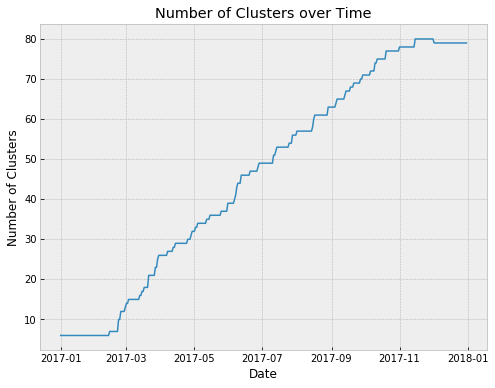

In [576]:
cluster_num_count = online_tracker_info_records.loc[:, clustering_time_stamps].\
    apply(lambda x: pd.Series.nunique(x) - 1)
incident_num_count = online_tracker_info_records.loc[:, clustering_time_stamps].\
    apply(lambda x: np.sum(x != -1))
plt.plot_date([datetime.datetime.strptime(x, '%Y-%m-%d') for x in cluster_num_count.index], 
               cluster_num_count.values, ls = 'solid', lw = 1.5, fillstyle = 'none', markersize = 0,
              label = 'Number of Clusters')
plt.title('Number of Clusters over Time')
plt.xlabel('Date')
plt.ylabel('Number of Clusters')
plt.show()

In [577]:
online_tracker_info_records.head()

ESN  CMP_SUM_NET_AMOUNT    DSID_CREATE_DATE   AGE  \
index                                                           
659    79953525              177.29 2017-03-23 08:18:45  -2.0   
662    79964090               61.50 2017-08-28 13:02:25  -1.0   
1378   79964113                 NaN 2017-11-07 05:18:27   NaN   
1382   79980569              226.65 2017-06-14 10:04:29 -10.0   
2061   79960577              404.96                 NaT   NaN   

      INCIDENT_TRACKER_JOIN_TYPE INCDT_ISSUE_LABEL  LAST_MILE_RECORDED  \
index                                                                    
659                         DSID         not_issue              9731.0   
662                         DSID         not_issue             45640.0   
1378                    EDS_ONLY         not_issue                 NaN   
1382                        DSID         not_issue              1602.0   
2061            RELIABILITY_ONLY       ne121-27483             32600.0   

            EARLIEST_DATE  Cluster_ID  2017-01-01     ...      2017-12-22  \
index                                                 ...                   
659   2017-03-30 00:00:00          43          -1     ...               8   
662   2017-08-28 00:00:00          11          -1     ...               5   
1378  2017-11-07 05:18:27           1          -1     ...               1   
1382  2017-06-14 00:00:00           2          -1     ...              33   
2061  2017-07-24 00:00:00           0          -1     ...               4   

       2017-12-23  2017-12-24  2017-12-25  2017-12-26  2017-12-27  2017-12-28  \
index                                                                           
659             8           8           8           8           8           8   
662             5           5           5           5           5           5   
1378            1           1           1           1           1           1   
1382           33          33          33          33          33          33   
2061            4           4           4           4           4           4   

       2017-12-29  2017-12-30  2017-12-31  
index                                      
659             8           8           8  
662             5           5           5  
1378            1           1           1  
1382           33          33          33  
2061            4           4           4  

[5 rows x 374 columns]

In [578]:
def plot_cluster_graph(selected_issue, 
                       start_date,
                       end_date,
                       tracking_type = 'final'):
    
    end_date = end_date - timedelta(days=1)
    
    issue_incidents = online_tracker_info_records.\
        loc[online_tracker_info_records.INCDT_ISSUE_LABEL == selected_issue, 
            ['ESN', 'EARLIEST_DATE']].sort_values('EARLIEST_DATE')
    issue_incidents['Incident_Count'] = 1
    issue_incidents['Cumulative_Count'] = issue_incidents['Incident_Count'].cumsum()
    # Calculate the size of clusters over time
    cluster_change_over_time = online_tracker_info_records.\
        loc[:, clustering_time_stamps].\
        apply(lambda x:pd.Series(x).value_counts()).fillna(0)
    # Calculate the purity of clusters over time
    cluster_purity_change_over_time = online_tracker_info_records.\
        loc[online_tracker_info_records.INCDT_ISSUE_LABEL.isin(['not_issue', selected_issue]), 
            clustering_time_stamps].\
        apply(lambda x:pd.Series(x).value_counts()).fillna(0)
        
    plt.plot_date(issue_incidents.EARLIEST_DATE, 
                  issue_incidents.Cumulative_Count, 
                  ls = 'solid', lw = 1.5,
                  label = 'Number of Incidents for Issue ' + selected_issue)
    
    issue_earliest_date = issue_incidents.iloc[0, 1].date()
#     print('The earliest detect date for incidents belong to this issue is ' + \
#               str(issue_earliest_date))
    if issue_earliest_date > start_date:
        issue_earliest_date = str(issue_earliest_date)[:10]
    else:
        issue_earliest_date = str(start_date)[:10]
    
    if tracking_type in ['final', 'first']:
        if tracking_type == 'final':
            tmp_df = online_tracker_info_records.\
                loc[online_tracker_info_records.INCDT_ISSUE_LABEL == selected_issue, 
                    :].sort_values('EARLIEST_DATE')[str(end_date)[:10]].value_counts()
            top_cluster_row = tmp_df.index[0] + 1
        elif tracking_type == 'first':
            tmp_df = online_tracker_info_records.\
                loc[online_tracker_info_records.INCDT_ISSUE_LABEL == selected_issue, 
                    :].sort_values('EARLIEST_DATE')[issue_earliest_date].\
                value_counts()
            top_cluster_row = tmp_df.index[1] + 1

        plt.plot_date([datetime.datetime.strptime(x, '%Y-%m-%d') for x in cluster_change_over_time.columns], 
                      cluster_change_over_time.iloc[top_cluster_row, :], 
                      ls = 'solid', lw = 1.5, fillstyle = 'none', 
                      markersize = 0,
                      label = 'Number of Incidents in Top Cluster with ID ' + \
                          str(top_cluster_row - 1))
        plt.plot_date([datetime.datetime.strptime(x, '%Y-%m-%d') for x in cluster_purity_change_over_time.columns], 
                      cluster_purity_change_over_time.loc[[top_cluster_row - 1]].values[0], 
                      ls = 'solid', lw = 1.5, fillstyle = 'none', 
                      markersize = 0,
                      label = 'Number of Incidents Belong to Current Issue and not_issue in Cluster ' + \
                          str(top_cluster_row - 1))
    else:
        # update cluster ID at each iteration
        cluster_size_record = []
        incident_num_in_cluster = []
        total_col_num = online_tracker_info_records.shape[1]
        # print(np.where(online_tracker_info_records.columns == issue_earliest_date)[0][0])
        start_col_num = np.where(online_tracker_info_records.columns == issue_earliest_date)[0][0]
        negative_filtered_df = online_tracker_info_records.\
                                query('INCDT_ISSUE_LABEL == @selected_issue')
        cluster_evaluation_df = online_tracker_info_records.\
                                loc[online_tracker_info_records.INCDT_ISSUE_LABEL.isin([selected_issue, 
                                                                                            'not_issue']), :].\
                                copy()
        while start_col_num < total_col_num:
            negative_filtered_df_tmp = negative_filtered_df.loc[negative_filtered_df.iloc[:, start_col_num] != -1, :]

            if negative_filtered_df_tmp.shape[0] > 0:
                cur_cluster_id = negative_filtered_df_tmp.iloc[:, start_col_num].value_counts().index[0]
                cluster_size_record.append(np.sum(online_tracker_info_records.\
                                           iloc[:, start_col_num] == cur_cluster_id))
                incident_num_in_cluster.append(np.sum(cluster_evaluation_df.\
                                               iloc[:, start_col_num] == cur_cluster_id))
            else:
                cluster_size_record.append(0)
                incident_num_in_cluster.append(0)
            start_col_num = start_col_num + 1
            
        plt.plot_date([datetime.datetime.strptime(x, '%Y-%m-%d') for x in \
                       online_tracker_info_records.\
                           columns[np.where(online_tracker_info_records.columns == issue_earliest_date)[0][0]:]], 
                      cluster_size_record, 
                      ls = 'solid', lw = 1.5, fillstyle = 'none', 
                      markersize = 0,
                      label = 'Number of Incidents in Top Cluster')
        
        plt.plot_date([datetime.datetime.strptime(x, '%Y-%m-%d') for x in \
                       online_tracker_info_records.\
                           columns[np.where(online_tracker_info_records.columns == issue_earliest_date)[0][0]:]], 
                      incident_num_in_cluster, 
                      ls = 'solid', lw = 1.5, fillstyle = 'none', 
                      markersize = 0,
                      label = 'Number of Incidents Belong to Current Issue and not_issue in Cluster')
    plt.xlabel('Date')
    plt.legend()
    plt.ylabel('Number of Incidents')
    plt.show()

In [579]:
top_issues = online_tracker_info.INCDT_ISSUE_LABEL.value_counts()

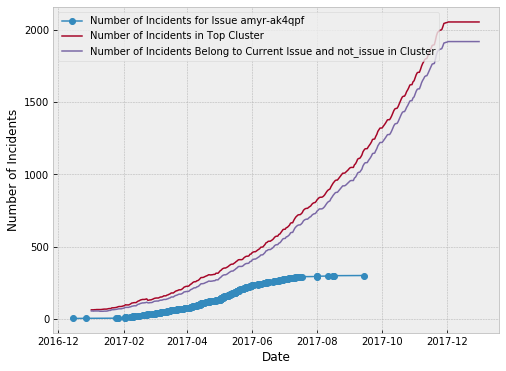

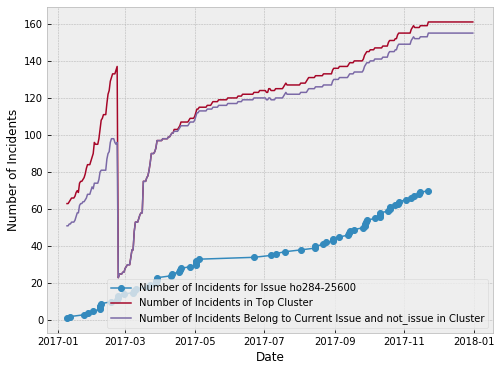

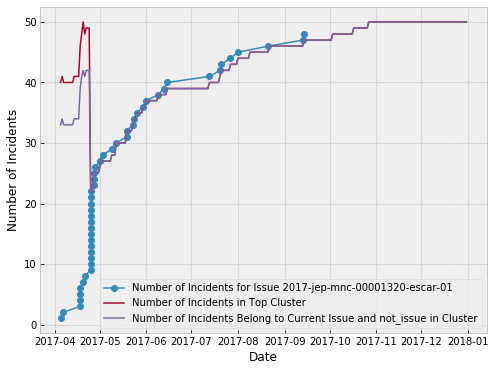

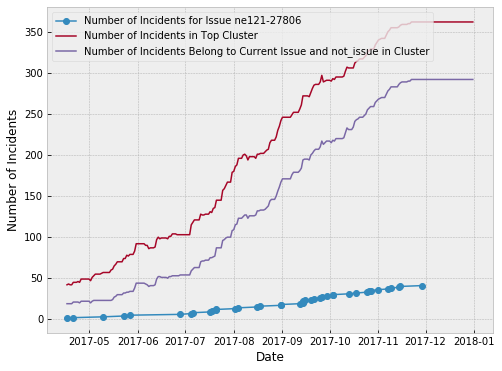

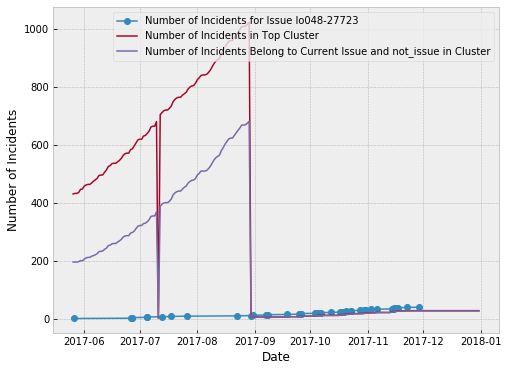

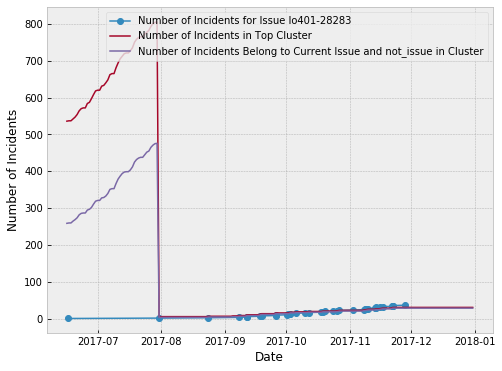

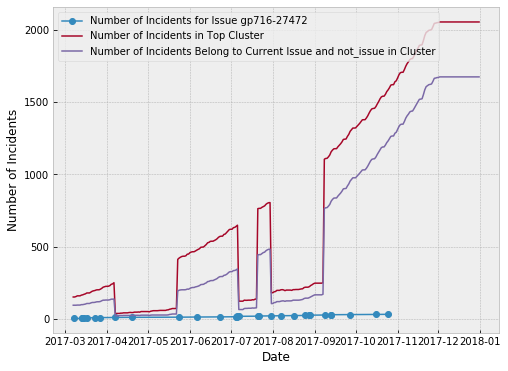

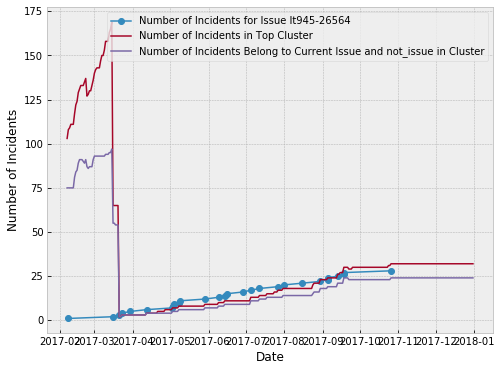

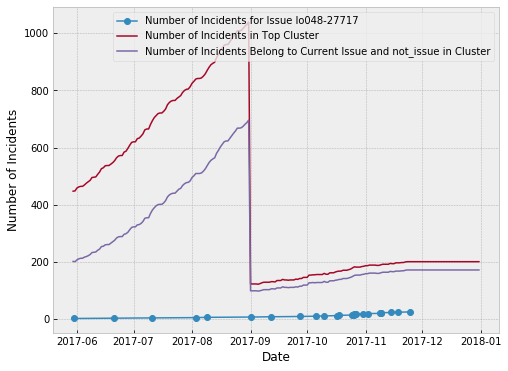

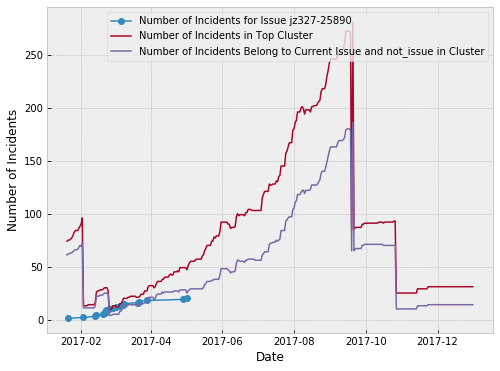

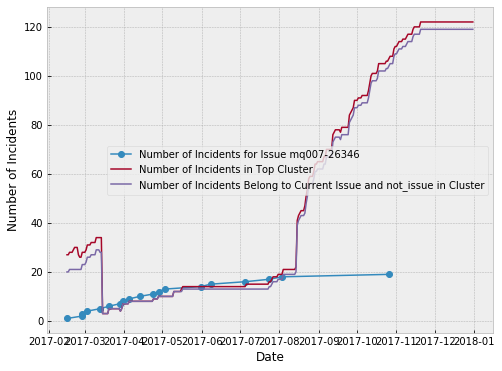

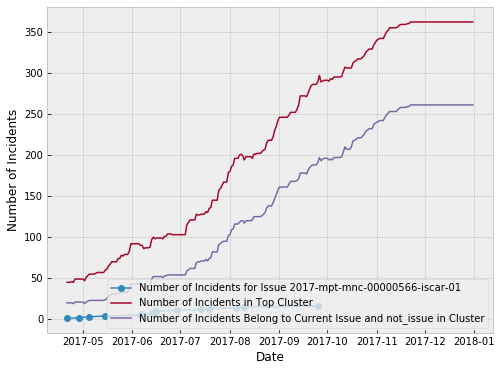

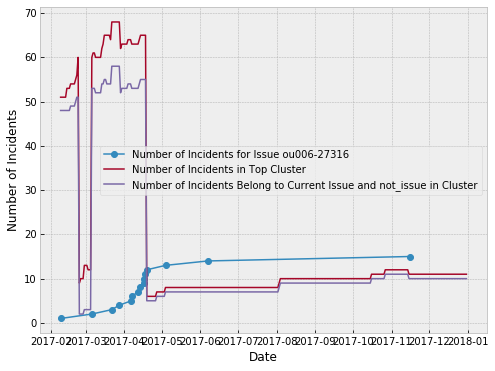

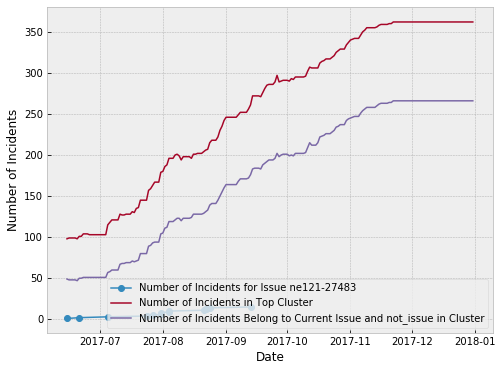

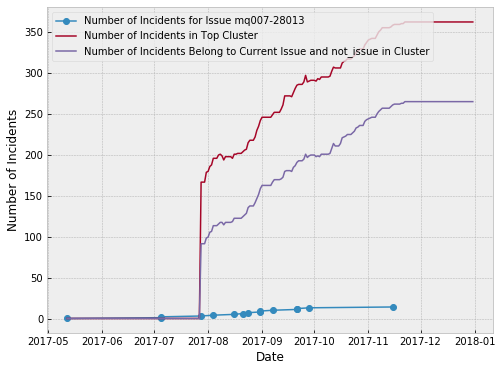

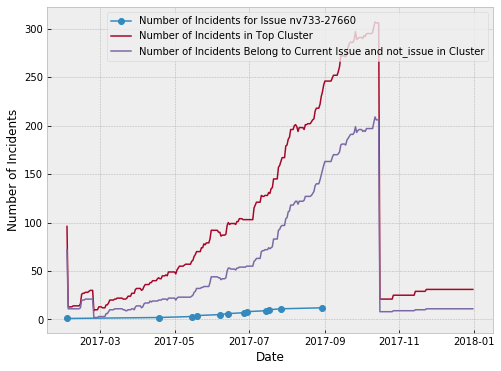

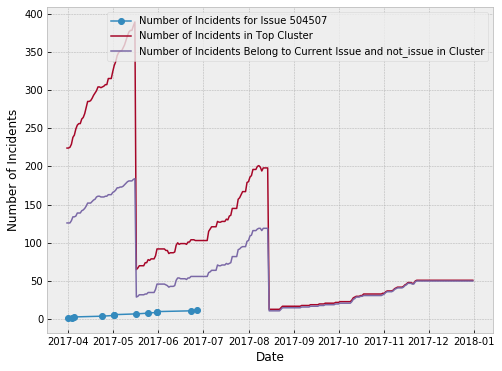

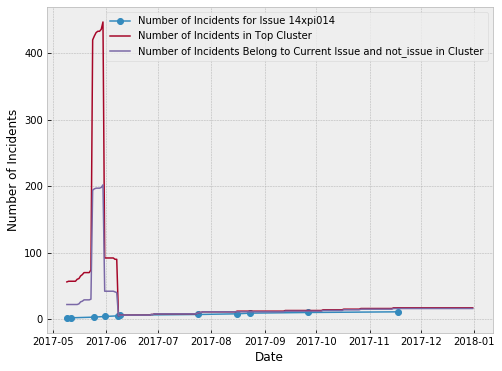

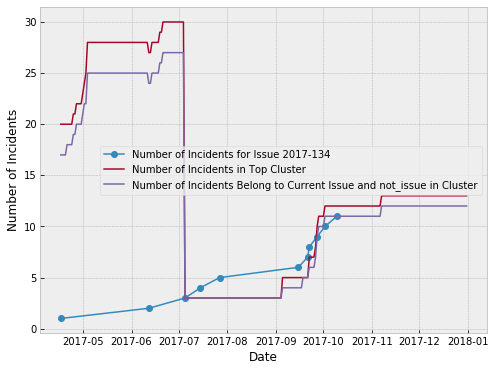

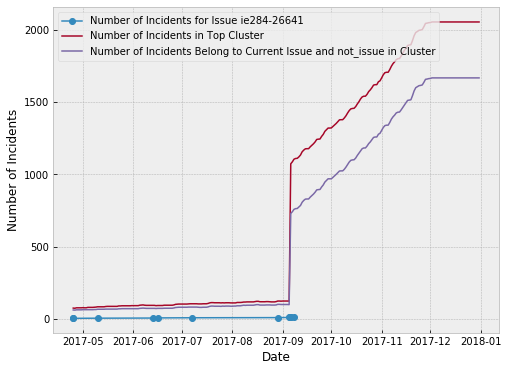

In [580]:
for cur_issue in top_issues.index[1:21]:
    plot_cluster_graph(cur_issue, start_date, end_date, tracking_type ='')

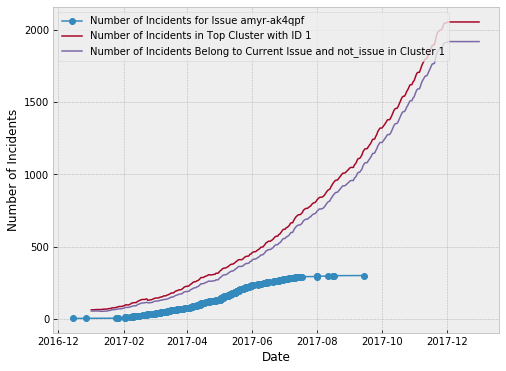

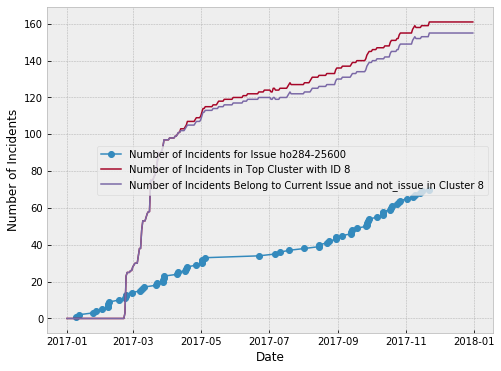

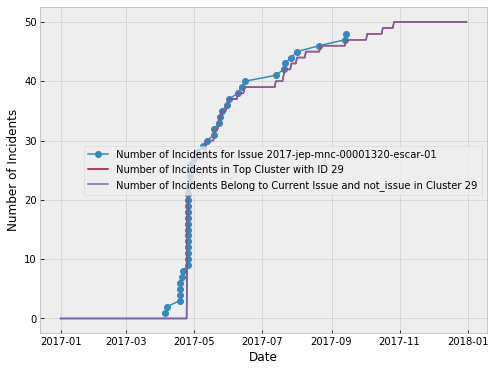

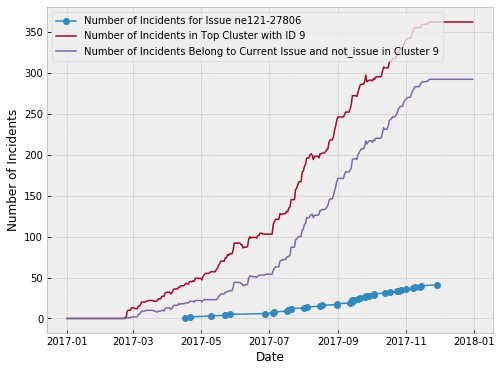

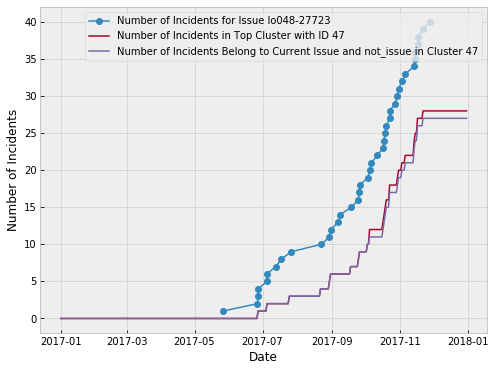

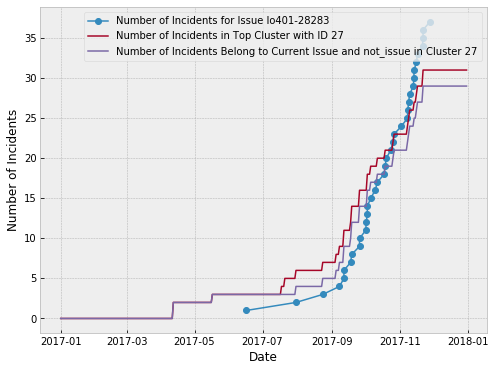

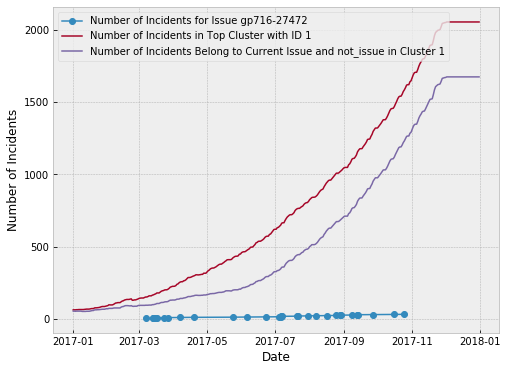

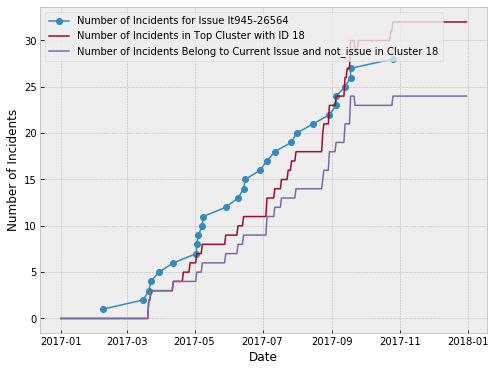

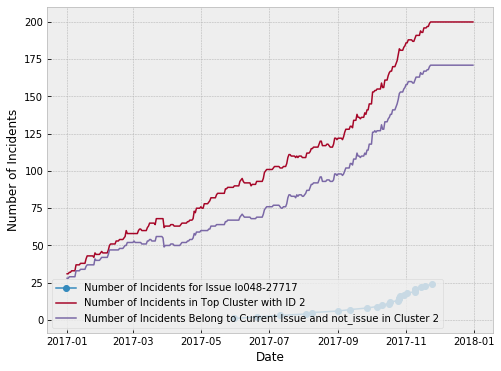

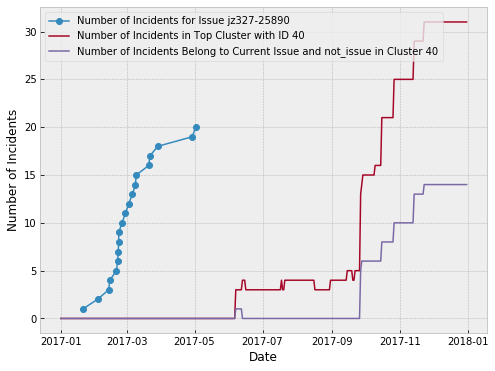

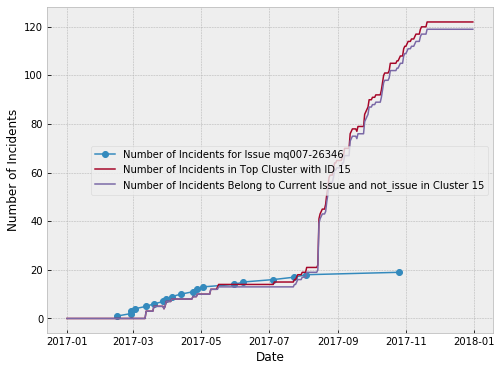

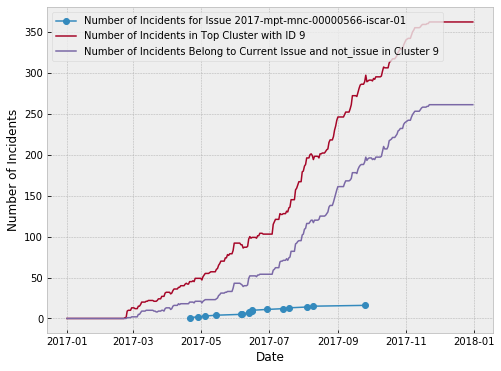

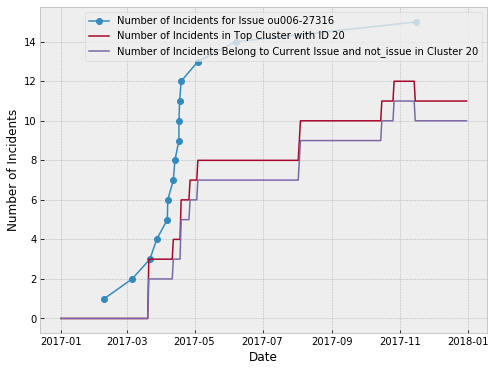

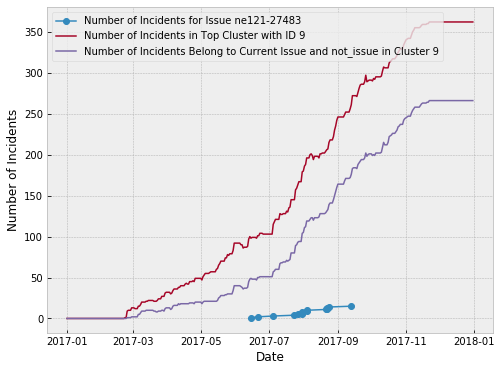

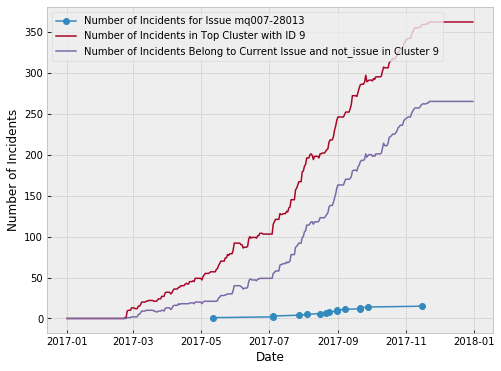

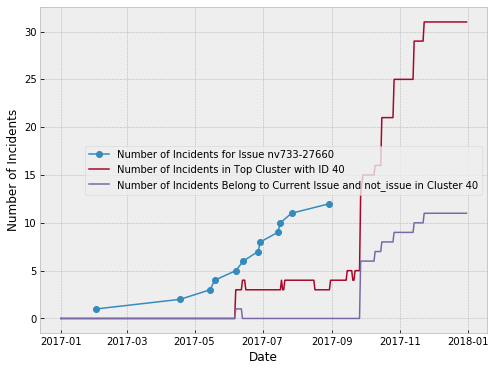

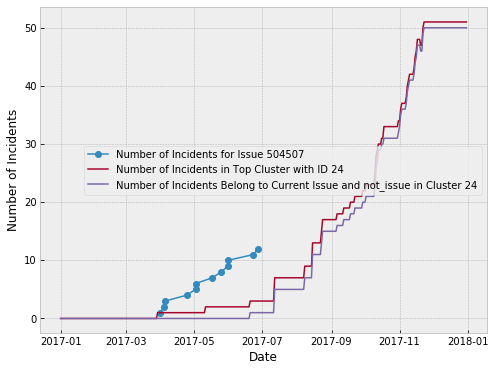

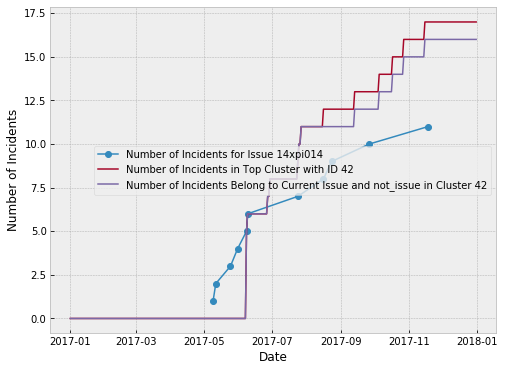

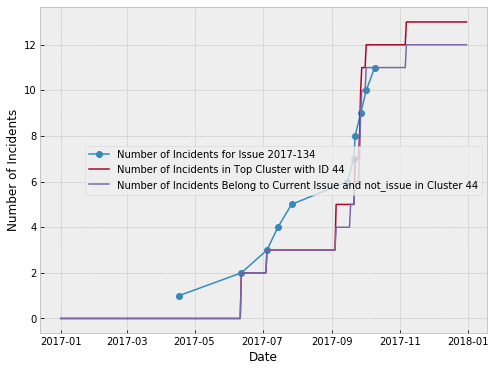

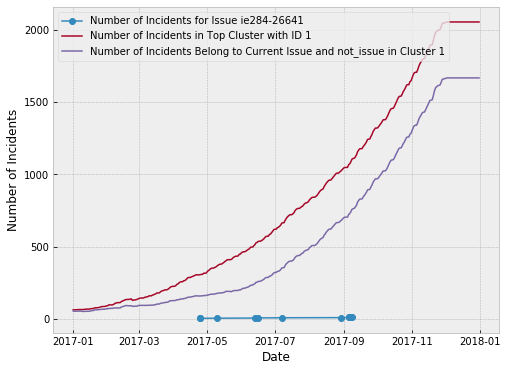

In [581]:
for cur_issue in top_issues.index[1:21]:
    plot_cluster_graph(cur_issue, start_date, end_date)

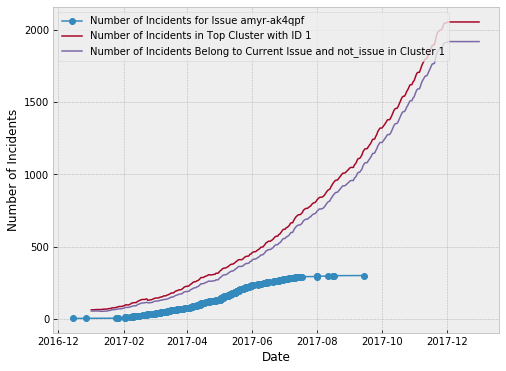

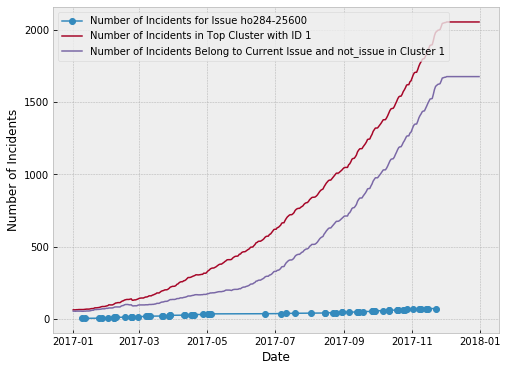

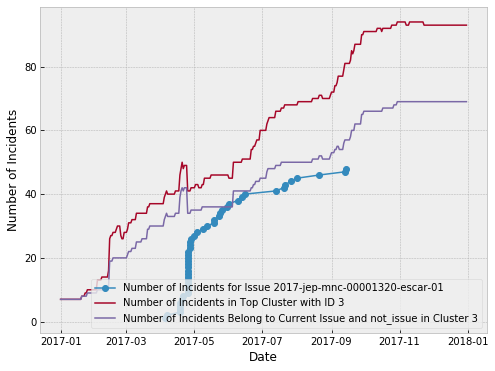

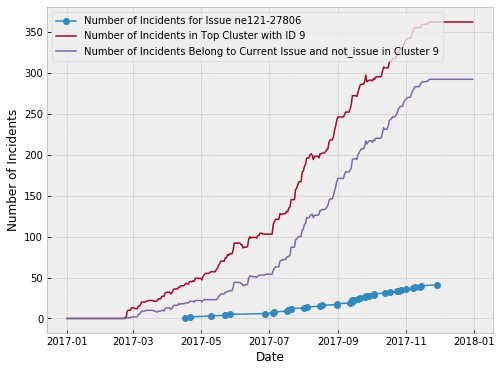

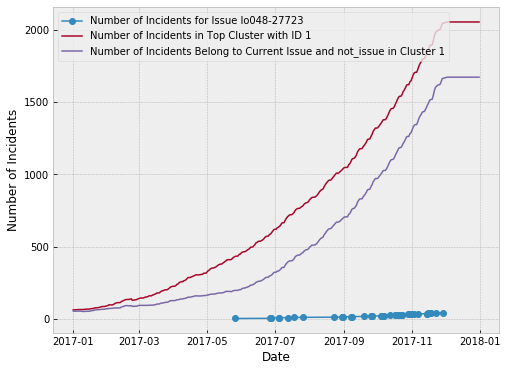

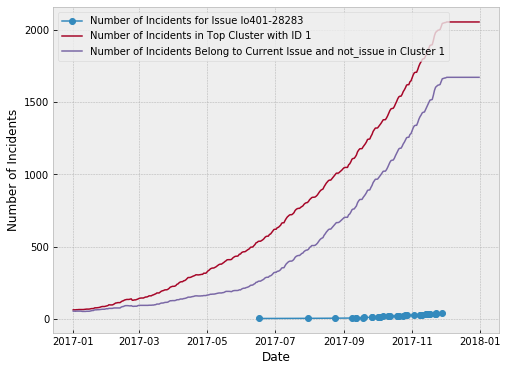

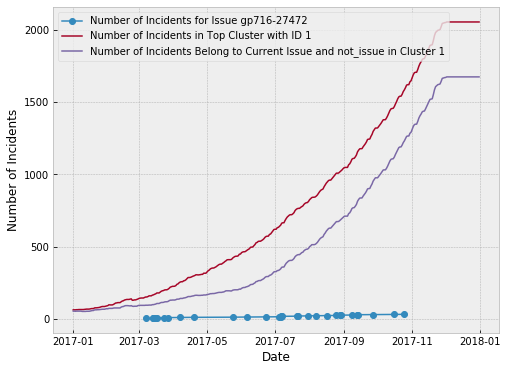

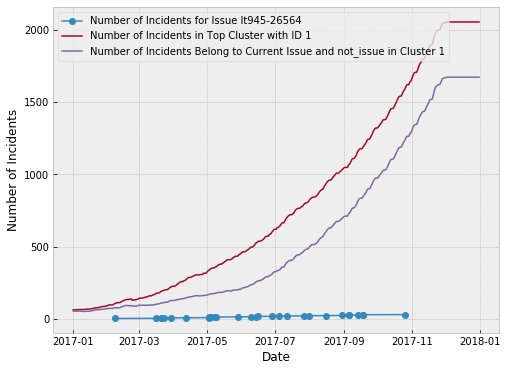

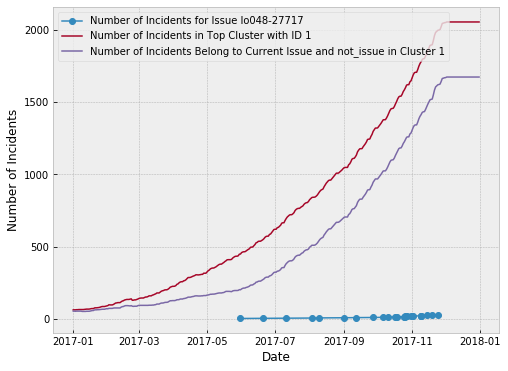

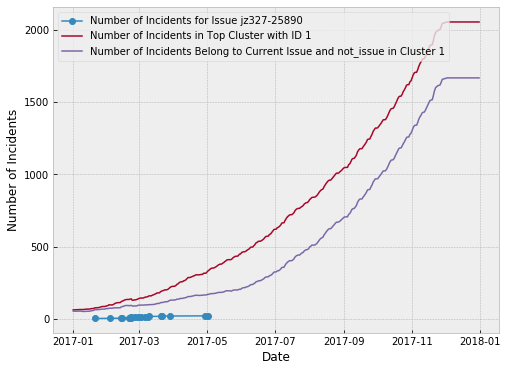

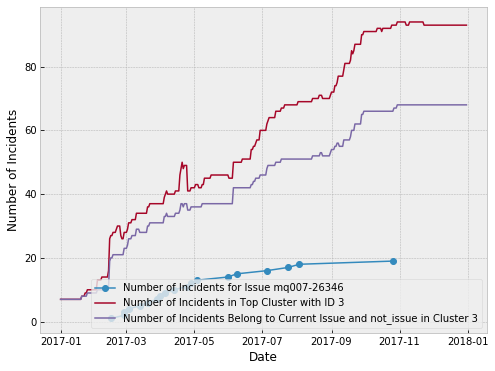

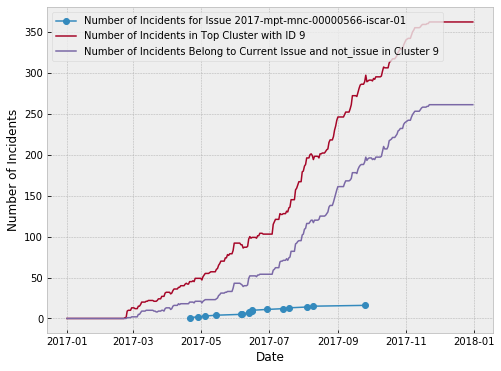

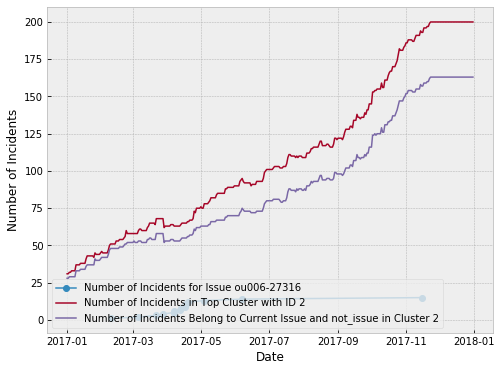

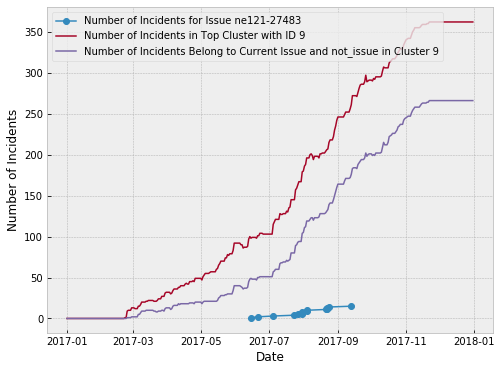

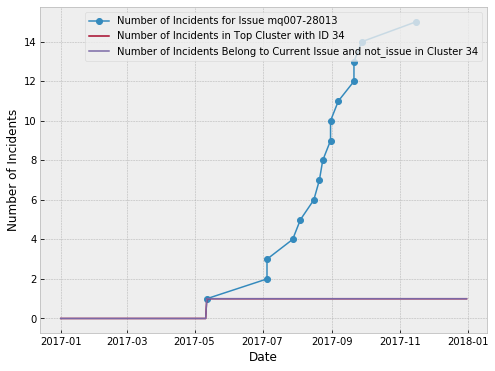

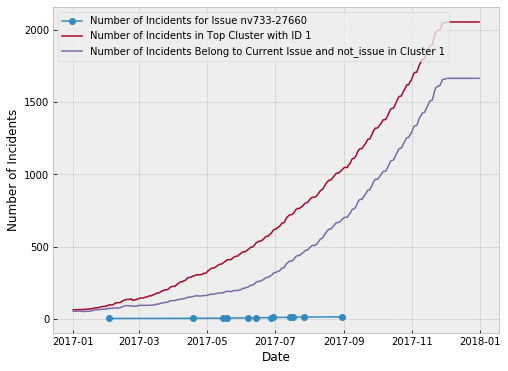

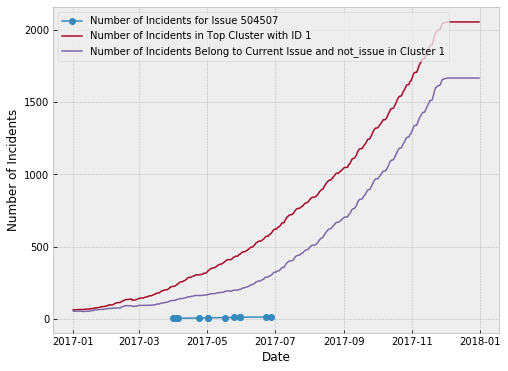

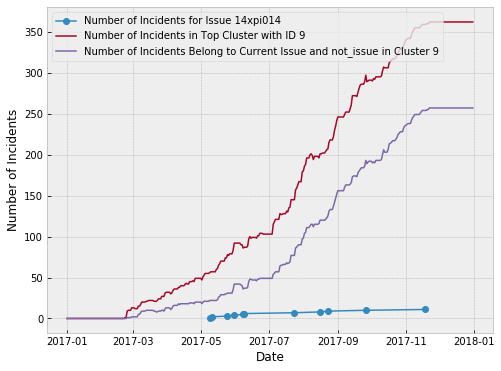

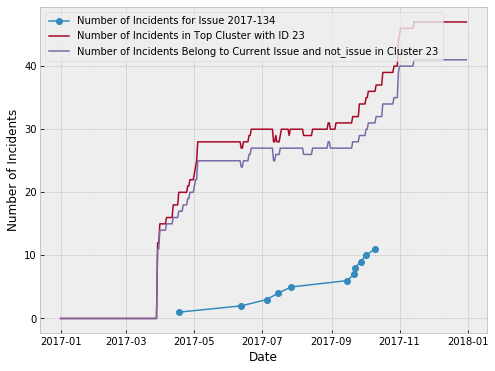

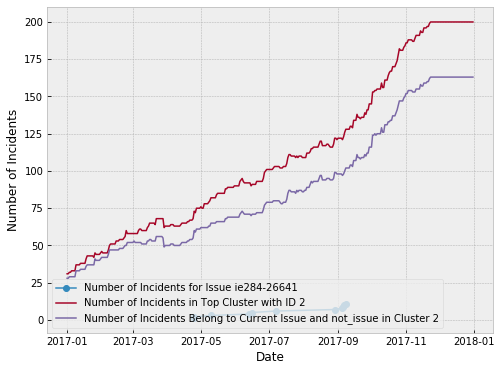

In [582]:
for cur_issue in top_issues.index[1:21]:
    plot_cluster_graph(cur_issue, start_date, end_date, tracking_type='first')

In [273]:
selected_issue = 'mq007-28013'

issue_incidents = online_tracker_info_records.\
    loc[online_tracker_info_records.INCDT_ISSUE_LABEL == selected_issue, 
        ['ESN', 'EARLIEST_DATE']].sort_values('EARLIEST_DATE')
issue_incidents['Incident_Count'] = 1
issue_incidents['Cumulative_Count'] = issue_incidents['Incident_Count'].cumsum()

In [274]:
cluster_change_over_time = online_tracker_info_records.\
    loc[:, clustering_time_stamps].\
    apply(lambda x:pd.Series(x).value_counts()).fillna(0)

In [275]:
top_cluster_row = online_tracker_info_records.\
    loc[online_tracker_info_records.INCDT_ISSUE_LABEL == selected_issue, 
        :].sort_values('EARLIEST_DATE')['2017-11-30'].value_counts().\
    index[0] + 1

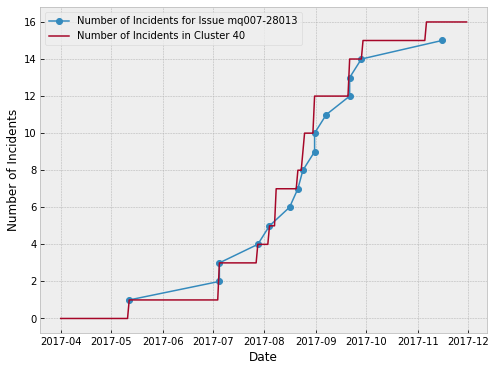

In [278]:
plt.plot_date(issue_incidents.EARLIEST_DATE, 
              issue_incidents.Cumulative_Count, 
              ls = 'solid', lw = 1.5,
              label = 'Number of Incidents for Issue ' + selected_issue)

plt.plot_date([datetime.datetime.strptime(x, '%Y-%m-%d') for x in cluster_change_over_time.columns], 
              cluster_change_over_time.iloc[top_cluster_row, :], 
              ls = 'solid', lw = 1.5, fillstyle = 'none', 
              markersize = 0,
              label = 'Number of Incidents in Cluster ' + str(top_cluster_row - 1))

plt.xlabel('Date')
plt.legend()
plt.ylabel('Number of Incidents')
plt.show()